In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , accuracy_score
import xgboost as xgb

In [2]:
df = pd.read_csv("Downloads/GUIDE_Train.csv/GUIDE_Train.csv")
df.head(5)

,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,180388628218,0,612,123247,2024-06-04T06:05:15.000Z,7,6,InitialAccess,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,31,6,3
1,455266534868,88,326,210035,2024-06-14T03:01:25.000Z,58,43,Exfiltration,NaN,FalsePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,1056561957389,809,58352,712507,2024-06-13T04:52:55.000Z,423,298,InitialAccess,T1189,FalsePositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
3,1279900258736,92,32992,774301,2024-06-10T16:39:36.000Z,2,2,CommandAndControl,NaN,BenignPositive,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,214748368522,148,4359,188041,2024-06-15T01:08:07.000Z,9,74,Execution,NaN,TruePositive,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
test_data = pd.read_csv("Downloads/GUIDE_Test.csv/GUIDE_Test_cleaned.csv")
test_data.head()

,OrgId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,IncidentGrade,EntityType,EvidenceRole,...,RegistryKey,RegistryValueName,RegistryValueData,ApplicationId,FileName,OSFamily,OSVersion,CountryCode,State,City
0,657,87199,2024-06-04T22:56:27.000Z,524,563,LateralMovement,T1021;T1047;T1105;T1569.002,BenignPositive,User,Impacted,...,1631,635,860,2251,289573,5,66,242,1445,10630
1,3,632273,2024-06-03T12:58:26.000Z,2,2,CommandAndControl,NaN,BenignPositive,Machine,Impacted,...,1631,635,860,2251,289573,0,0,242,1445,10630
2,145,131719,2024-06-08T03:20:49.000Z,2932,10807,LateralMovement,T1021;T1027.002;T1027.005;T1105,BenignPositive,Process,Related,...,1631,635,860,2251,14,5,66,242,1445,10630
3,222,917686,2024-06-12T12:07:31.000Z,0,0,InitialAccess,T1078;T1078.004,FalsePositive,CloudLogonSession,Related,...,1631,635,860,2251,289573,5,66,242,1445,10630
4,363,5944,2024-06-06T17:42:05.000Z,27,18,Discovery,T1087;T1087.002,BenignPositive,User,Impacted,...,1631,635,860,2251,289573,5,66,242,1445,10630


In [5]:
test_target = test_data['IncidentGrade']

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9516837 entries, 0 to 9516836
Data columns (total 45 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Id                  int64  
 1   OrgId               int64  
 2   IncidentId          int64  
 3   AlertId             int64  
 4   Timestamp           object 
 5   DetectorId          int64  
 6   AlertTitle          int64  
 7   Category            object 
 8   MitreTechniques     object 
 9   IncidentGrade       object 
 10  ActionGrouped       object 
 11  ActionGranular      object 
 12  EntityType          object 
 13  EvidenceRole        object 
 14  DeviceId            int64  
 15  Sha256              int64  
 16  IpAddress           int64  
 17  Url                 int64  
 18  AccountSid          int64  
 19  AccountUpn          int64  
 20  AccountObjectId     int64  
 21  AccountName         int64  
 22  DeviceName          int64  
 23  NetworkMessageId    int64  
 24  EmailClusterId      floa

In [6]:
df.isnull().sum()

Id                          0
OrgId                       0
IncidentId                  0
AlertId                     0
Timestamp                   0
DetectorId                  0
AlertTitle                  0
Category                    0
MitreTechniques       5468386
IncidentGrade           51340
ActionGrouped         9460773
ActionGranular        9460773
EntityType                  0
EvidenceRole                0
DeviceId                    0
Sha256                      0
IpAddress                   0
Url                         0
AccountSid                  0
AccountUpn                  0
AccountObjectId             0
AccountName                 0
DeviceName                  0
NetworkMessageId            0
EmailClusterId        9420025
RegistryKey                 0
RegistryValueName           0
RegistryValueData           0
ApplicationId               0
ApplicationName             0
OAuthApplicationId          0
ThreatFamily          9441956
FileName                    0
FolderPath

In [7]:
df.dropna(subset=['IncidentGrade'], inplace=True)

In [8]:
df.drop(columns = ['MitreTechniques','ActionGrouped','ActionGranular','EmailClusterId','EmailClusterId','ThreatFamily','ResourceType','Roles','AntispamDirection','SuspicionLevel','LastVerdict'],inplace = True)

In [9]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [10]:
df['Year'] = df['Timestamp'].dt.year

In [11]:
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col] = df[col].astype('float32')
    elif df[col].dtype == 'int64':
        df[col] = df[col].astype('int32')
    elif df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [14]:
# To reduce memory usage and maintain balanced classes , using stratified downsampling 

#Downsampling to 30% data while maintaining class distribution

data_sampled,_ = train_test_split(df,train_size = 0.3,stratify = df['IncidentGrade'])

In [15]:
data_sampled.columns

Index(['Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp', 'DetectorId',
       'AlertTitle', 'Category', 'IncidentGrade', 'EntityType', 'EvidenceRole',
       'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid', 'AccountUpn',
       'AccountObjectId', 'AccountName', 'DeviceName', 'NetworkMessageId',
       'RegistryKey', 'RegistryValueName', 'RegistryValueData',
       'ApplicationId', 'ApplicationName', 'OAuthApplicationId', 'FileName',
       'FolderPath', 'ResourceIdName', 'OSFamily', 'OSVersion', 'CountryCode',
       'State', 'City', 'Year'],
      dtype='object')

## Cleaning test data

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 30 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   OrgId              1048575 non-null  int64 
 1   AlertId            1048575 non-null  int64 
 2   Timestamp          1048575 non-null  object
 3   DetectorId         1048575 non-null  int64 
 4   AlertTitle         1048575 non-null  int64 
 5   Category           1048575 non-null  object
 6   MitreTechniques    465951 non-null   object
 7   IncidentGrade      1048575 non-null  object
 8   EntityType         1048575 non-null  object
 9   EvidenceRole       1048575 non-null  object
 10  DeviceId           1048575 non-null  int64 
 11  Sha256             1048575 non-null  int64 
 12  IpAddress          1048575 non-null  int64 
 13  Url                1048575 non-null  int64 
 14  AccountSid         1048575 non-null  int64 
 15  AccountUpn         1048575 non-null  int64 
 16  

In [17]:
test_data.isnull().sum()

OrgId                     0
AlertId                   0
Timestamp                 0
DetectorId                0
AlertTitle                0
Category                  0
MitreTechniques      582624
IncidentGrade             0
EntityType                0
EvidenceRole              0
DeviceId                  0
Sha256                    0
IpAddress                 0
Url                       0
AccountSid                0
AccountUpn                0
AccountObjectId           0
AccountName               0
DeviceName                0
NetworkMessageId          0
RegistryKey               0
RegistryValueName         0
RegistryValueData         0
ApplicationId             0
FileName                  0
OSFamily                  0
OSVersion                 0
CountryCode               0
State                     0
City                      0
dtype: int64

In [90]:
for col in test_data.columns:
    if test_data[col].dtype == 'float64':
        test_train_data[col] = test_data[col].astype('float32')
    elif test_data[col].dtype == 'int64':
        test_data[col] = test_data[col].astype('int32')
    elif test_data[col].dtype == 'object':
        test_data[col] = test_data[col].astype('category')

In [77]:
test_data['Year'] = test_data['Timestamp'].dt.year

In [78]:
test_train_data = test_data[['AlertTitle','Category','IncidentGrade','EntityType','EvidenceRole','Sha256','IpAddress','NetworkMessageId','RegistryValueName','RegistryValueData','FileName','OSFamily','OSVersion','Year']]

In [75]:
test_data['Timestamp'] = pd.to_datetime(test_data['Timestamp'])

In [91]:
test_data.dtypes

OrgId                              int32
AlertId                            int32
Timestamp            datetime64[ns, UTC]
DetectorId                         int32
AlertTitle                         int32
Category                        category
MitreTechniques                 category
IncidentGrade                   category
EntityType                      category
EvidenceRole                    category
DeviceId                           int32
Sha256                             int32
IpAddress                          int32
Url                                int32
AccountSid                         int32
AccountUpn                         int32
AccountObjectId                    int32
AccountName                        int32
DeviceName                         int32
NetworkMessageId                   int32
RegistryKey                        int32
RegistryValueName                  int32
RegistryValueData                  int32
ApplicationId                      int32
FileName        

In [19]:
for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = test_data[col].astype('category')

# EDA 

In [21]:
data_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2839649 entries, 1654691 to 4798778
Data columns (total 36 columns):
 #   Column              Dtype              
---  ------              -----              
 0   Id                  int32              
 1   OrgId               int32              
 2   IncidentId          int32              
 3   AlertId             int32              
 4   Timestamp           datetime64[ns, UTC]
 5   DetectorId          int32              
 6   AlertTitle          int32              
 7   Category            category           
 8   IncidentGrade       category           
 9   EntityType          category           
 10  EvidenceRole        category           
 11  DeviceId            int32              
 12  Sha256              int32              
 13  IpAddress           int32              
 14  Url                 int32              
 15  AccountSid          int32              
 16  AccountUpn          int32              
 17  AccountObjectId     i

In [22]:
data_sampled.describe()

,Id,OrgId,IncidentId,AlertId,DetectorId,AlertTitle,DeviceId,Sha256,IpAddress,Url,...,OAuthApplicationId,FileName,FolderPath,ResourceIdName,OSFamily,OSVersion,CountryCode,State,City,Year
count,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,...,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06,2.839649e+06
mean,2.603044e+03,1.774435e+02,6.948010e+04,4.028022e+05,1.062303e+02,2.774084e+03,9.566141e+04,1.286626e+05,2.853417e+05,1.502956e+05,...,8.807898e+02,2.621332e+05,1.075642e+05,3.583538e+03,4.898320e+00,6.465301e+01,2.235674e+02,1.350873e+03,9.931538e+03,2.024000e+03
std,1.437988e+03,3.736052e+02,1.189041e+05,4.562210e+05,4.181190e+02,1.090565e+04,1.635694e+04,3.408215e+04,1.415052e+05,3.756940e+04,...,1.306806e+01,8.169320e+04,3.228503e+04,8.899791e+01,7.042636e-01,9.323331e+00,6.296839e+01,3.520420e+02,2.614986e+03,4.596622e-03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.023000e+03
25%,1.648000e+03,9.000000e+00,4.950000e+02,2.287400e+04,2.000000e+00,2.000000e+00,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03
50%,2.418000e+03,4.400000e+01,1.012300e+04,2.141540e+05,9.000000e+00,1.100000e+01,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03
75%,3.864000e+03,1.690000e+02,8.285600e+04,6.643870e+05,4.400000e+01,1.710000e+02,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03
max,5.427000e+03,6.107000e+03,5.996970e+05,1.721456e+06,9.522000e+03,1.131720e+05,9.879900e+04,1.382680e+05,3.606060e+05,1.603960e+05,...,8.810000e+02,2.895730e+05,1.176680e+05,3.586000e+03,5.000000e+00,6.600000e+01,2.420000e+02,1.445000e+03,1.063000e+04,2.024000e+03


<Axes: >

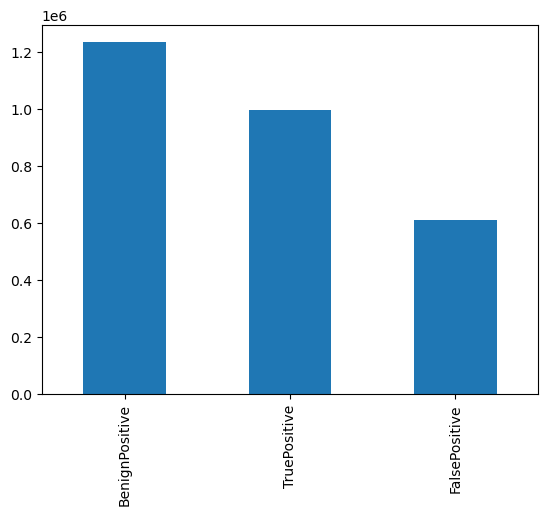

In [23]:
data_sampled['IncidentGrade'].value_counts().plot(kind = 'bar')

C:\Users\adith\AppData\Local\Temp\ipykernel_15380\1605994498.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data_sampled.corr()


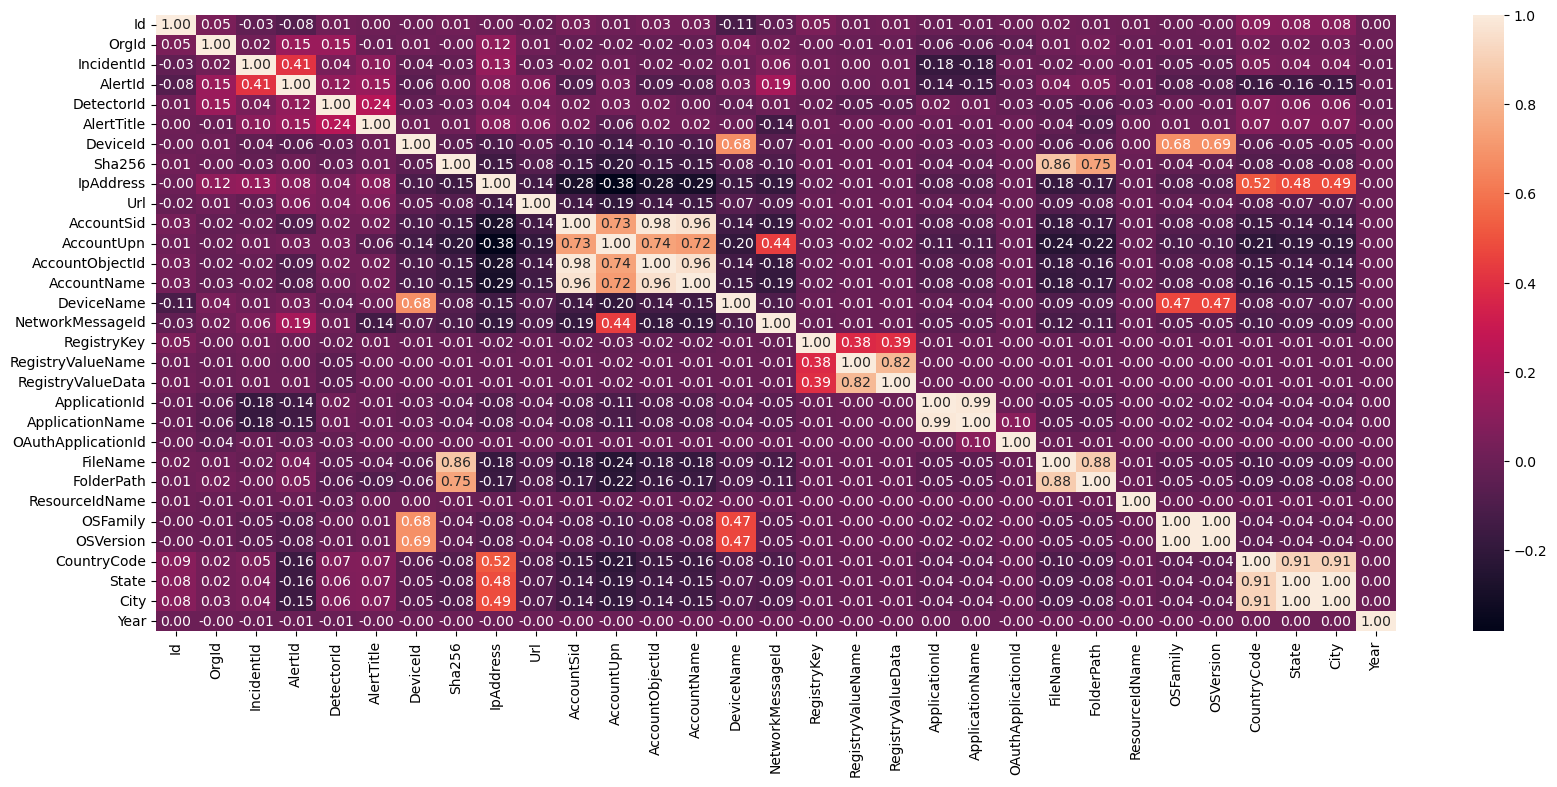

In [24]:
#Feature correlation 
#Calculate correlations on numeric columns to avoid heavy processing

#plot correlation matrix 

corr_matrix = data_sampled.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix,annot = True,fmt='.2f')
plt.show()

In [25]:
data_sampled.drop(columns = ['Id','Timestamp','OrgId','IncidentId','AlertId','DetectorId','DeviceName','Url','AccountSid','RegistryKey','AccountObjectId','AccountName','ApplicationId','OAuthApplicationId','FolderPath','ResourceIdName'],inplace = True)

In [26]:
data_sampled

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,DeviceId,Sha256,IpAddress,AccountUpn,NetworkMessageId,RegistryValueName,RegistryValueData,ApplicationName,FileName,OSFamily,OSVersion,CountryCode,State,City,Year
1654691,30,InitialAccess,TruePositive,User,Impacted,98799,138268,360606,11240,529644,635,860,3421,289573,5,66,242,1445,10630,2024
3120802,2,CommandAndControl,BenignPositive,Url,Related,98799,138268,360606,673934,529644,635,860,3421,289573,5,66,242,1445,10630,2024
4427346,4,SuspiciousActivity,TruePositive,User,Impacted,98799,138268,360606,42943,529644,635,860,3421,289573,5,66,242,1445,10630,2024
6319135,25,Impact,BenignPositive,User,Impacted,98799,138268,360606,92885,529644,635,860,3421,289573,5,66,242,1445,10630,2024
4083817,92,CredentialAccess,FalsePositive,Process,Related,98799,71,360606,673934,529644,635,860,3421,70,5,66,242,1445,10630,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201812,318,Persistence,BenignPositive,User,Impacted,98799,138268,360606,4838,529644,635,860,3421,289573,5,66,242,1445,10630,2024
9427059,42456,Exfiltration,FalsePositive,MailMessage,Impacted,98799,138268,360606,357544,252764,635,860,3421,289573,5,66,242,1445,10630,2024
1912281,220,SuspiciousActivity,BenignPositive,CloudApplication,Impacted,98799,138268,360606,673934,529644,635,860,1,289573,5,66,242,1445,10630,2024
4096286,3,InitialAccess,TruePositive,CloudLogonRequest,Related,98799,138268,360606,673934,529644,635,860,3421,289573,5,66,242,1445,10630,2024


In [27]:
data_sampled['Sha256'].nunique()

53080

In [28]:
data_sampled.drop(columns = ['DeviceId','AccountUpn','ApplicationName','CountryCode','State','City'],inplace = True)

In [29]:
#visualise the count of attacks in year
Incident_counts = data_sampled.groupby(['Year','IncidentGrade']).size()

In [30]:
Incident_counts

Year  IncidentGrade 
2023  BenignPositive         15
      FalsePositive           0
      TruePositive           45
2024  BenignPositive    1233230
      FalsePositive      609590
      TruePositive       996769
dtype: int64

In [31]:
Incident_counts = Incident_counts.reset_index(name = 'Count')

In [32]:
Incident_counts

,Year,IncidentGrade,Count
0,2023,BenignPositive,15
1,2023,FalsePositive,0
2,2023,TruePositive,45
3,2024,BenignPositive,1233230
4,2024,FalsePositive,609590
5,2024,TruePositive,996769


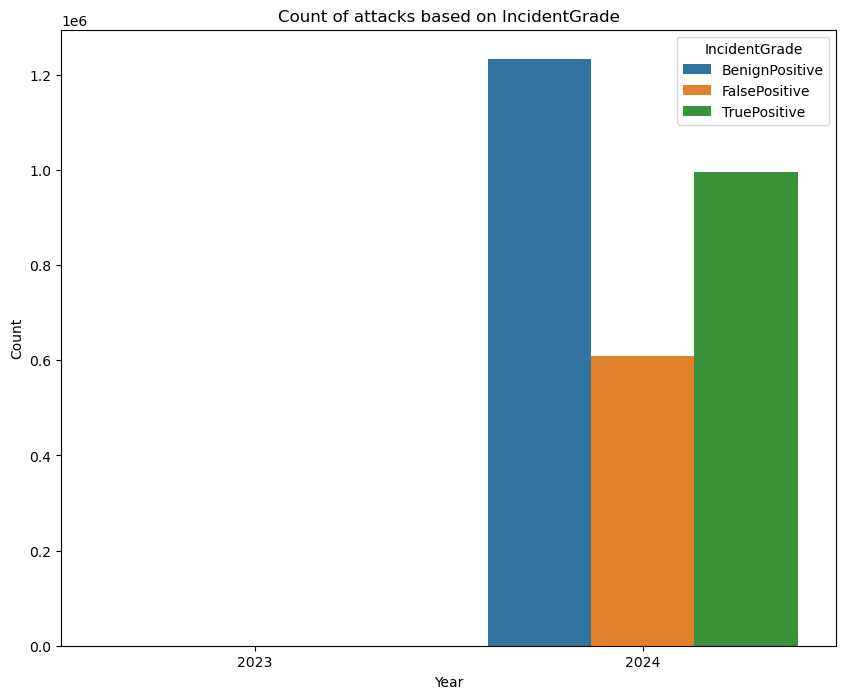

In [33]:
plt.figure(figsize = (10,8))
sns.barplot(data = Incident_counts , x = 'Year', y = 'Count' , hue = 'IncidentGrade')

plt.title('Count of attacks based on IncidentGrade')
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title = "IncidentGrade")
plt.show()

In [34]:
data_sampled.dtypes

AlertTitle              int32
Category             category
IncidentGrade        category
EntityType           category
EvidenceRole         category
Sha256                  int32
IpAddress               int32
NetworkMessageId        int32
RegistryValueName       int32
RegistryValueData       int32
FileName                int32
OSFamily                int32
OSVersion               int32
Year                    int32
dtype: object

In [35]:
#Feature Scaling
scaler = StandardScaler()
numeric_cols = data_sampled.select_dtypes(include = ['float32','int32']).columns
data_sampled[numeric_cols] = scaler.fit_transform(data_sampled[numeric_cols])

In [36]:
#Encoding Categorical variables

label_encoder = {}

for column in data_sampled.select_dtypes(include = 'category').columns:
    le = LabelEncoder()
    data_sampled[column] = le.fit_transform(data_sampled[column])
    label_encoder[column] = le

In [37]:
data_sampled

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Sha256,IpAddress,NetworkMessageId,RegistryValueName,RegistryValueData,FileName,OSFamily,OSVersion,Year
1654691,-0.251620,10,2,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
3120802,-0.254188,1,0,27,1,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
4427346,-0.254004,16,2,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
6319135,-0.252079,9,0,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
4083817,-0.245935,2,1,23,1,-3.772991,0.531884,0.351199,0.021218,0.02344,-3.207895,0.144378,0.144475,0.004597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201812,-0.225212,13,0,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
9427059,3.638656,7,1,17,0,0.281830,0.531884,-1.596879,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
1912281,-0.234198,16,0,5,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
4096286,-0.254096,10,2,6,1,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597


In [38]:
#Split data into training and test sets

X = data_sampled.drop(columns = 'IncidentGrade')
y = data_sampled['IncidentGrade']

In [81]:
X

,AlertTitle,Category,EntityType,EvidenceRole,Sha256,IpAddress,NetworkMessageId,RegistryValueName,RegistryValueData,FileName,OSFamily,OSVersion,Year
1654691,-0.251620,10,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
3120802,-0.254188,1,27,1,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
4427346,-0.254004,16,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
6319135,-0.252079,9,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
4083817,-0.245935,2,23,1,-3.772991,0.531884,0.351199,0.021218,0.02344,-3.207895,0.144378,0.144475,0.004597
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3201812,-0.225212,13,28,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
9427059,3.638656,7,17,0,0.281830,0.531884,-1.596879,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
1912281,-0.234198,16,5,0,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597
4096286,-0.254096,10,6,1,0.281830,0.531884,0.351199,0.021218,0.02344,0.335889,0.144378,0.144475,0.004597


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, stratify = y)

## Model Building

In [40]:
#initialize the model
model = RandomForestClassifier(n_estimators = 100 , max_depth = 10, random_state = 42)

In [41]:
model

RandomForestClassifier(max_depth=10, random_state=42)

In [42]:
#Train the model
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [43]:
# Make predictions
y_pred = model.predict(X_test)

In [44]:
#Evaluate 

print("Accuracy: ", accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy:  0.6748683816667547
              precision    recall  f1-score   support

           0       0.61      0.95      0.75    246649
           1       0.83      0.22      0.35    121918
           2       0.79      0.61      0.69    199363

    accuracy                           0.67    567930
   macro avg       0.75      0.59      0.60    567930
weighted avg       0.72      0.67      0.64    567930



In [45]:
#Increasing class weight to increase accuracy

In [46]:
rf_model = RandomForestClassifier(class_weight={0: 1, 1: 3, 2: 2})
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight={0: 1, 1: 3, 2: 2})

In [47]:
# Make predictions
y_pred_rf = rf_model.predict(X_test)

In [48]:
#Evaluate 
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%")
print(classification_report(y_test,y_pred_rf))

Accuracy: 75.90%
              precision    recall  f1-score   support

           0       0.85      0.73      0.79    246649
           1       0.66      0.66      0.66    121918
           2       0.73      0.85      0.78    199363

    accuracy                           0.76    567930
   macro avg       0.75      0.75      0.74    567930
weighted avg       0.77      0.76      0.76    567930



In [44]:
model = xgb.XGBClassifier(
    objective='multi:softmax',   # or 'binary:logistic' if binary classification
    eval_metric='mlogloss',      # or 'logloss' for binary classification
    use_label_encoder=False,     # Disable label encoding for sklearn interface
    random_state=42
)

model.fit(X_train, y_train)


C:\Users\adith\.conda\include\New folder\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:00:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [45]:
y_pred = model.predict(X_test)


In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 74.09%
              precision    recall  f1-score   support

           0       0.68      0.92      0.79    246649
           1       0.79      0.45      0.57    121918
           2       0.83      0.69      0.76    199363

    accuracy                           0.74    567930
   macro avg       0.77      0.69      0.70    567930
weighted avg       0.76      0.74      0.73    567930



In [48]:
model = xgb.XGBClassifier(
    objective='multi:softmax',   # or 'binary:logistic' for binary classification
    eval_metric='mlogloss',      # or 'logloss' for binary classification
    random_state=42
)


In [51]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [52]:
y_pred = model.predict(X_test)

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print(classification_report(y_test, y_pred))


Accuracy: 74.09%
              precision    recall  f1-score   support

           0       0.68      0.92      0.79    246649
           1       0.79      0.45      0.57    121918
           2       0.83      0.69      0.76    199363

    accuracy                           0.74    567930
   macro avg       0.77      0.69      0.70    567930
weighted avg       0.76      0.74      0.73    567930



In [54]:
!pip install imbalanced-learn


In [40]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)  # 'auto' will balance all classes
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize XGBoost model
model = xgb.XGBClassifier(
    objective='multi:softmax',
    eval_metric='mlogloss',
    random_state=42
)

# Train the model with the resampled data
model.fit(X_train_res, y_train_res)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(classification_report(y_test, y_pred))

## preprocessing test data

In [92]:
#Feature Scaling
scaler = StandardScaler()
numeric_cols = test_train_data.select_dtypes(include = ['float32','int32']).columns
test_train_data[numeric_cols] = scaler.fit_transform(test_train_data[numeric_cols])

C:\Users\adith\AppData\Local\Temp\ipykernel_15380\3347277757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_train_data[numeric_cols] = scaler.fit_transform(test_train_data[numeric_cols])


In [96]:
#Encoding Categorical variables

label_encoder = {}

for column in test_train_data.select_dtypes(include = 'category').columns:
    le = LabelEncoder()
    test_train_data[column] = le.fit_transform(test_train_data[column])
    label_encoder[column] = le

C:\Users\adith\AppData\Local\Temp\ipykernel_15380\2629455205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_train_data[column] = le.fit_transform(test_train_data[column])
C:\Users\adith\AppData\Local\Temp\ipykernel_15380\2629455205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_train_data[column] = le.fit_transform(test_train_data[column])
C:\Users\adith\AppData\Local\Temp\ipykernel_15380\2629455205.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [97]:
test_train_data

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Sha256,IpAddress,NetworkMessageId,RegistryValueName,RegistryValueData,FileName,OSFamily,OSVersion,Year
0,-0.188223,11,0,24,0,0.285282,0.522877,0.337581,0.027732,0.031176,0.336882,0.143911,0.144024,0.004581
1,-0.241840,1,0,11,0,0.285282,0.522877,0.337581,0.027732,0.031176,0.336882,-6.977913,-6.956414,0.004581
2,0.790835,11,0,19,1,-3.593135,0.522877,0.337581,0.027732,0.031176,-3.191856,0.143911,0.144024,0.004581
3,-0.242031,10,1,6,1,0.285282,0.522877,0.337581,0.027732,0.031176,0.336882,0.143911,0.144024,0.004581
4,-0.240311,5,0,24,0,0.285282,0.522877,0.337581,0.027732,0.031176,0.336882,0.143911,0.144024,0.004581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,-0.242031,10,2,10,1,0.285282,-2.049257,0.337581,0.027732,0.031176,0.336882,0.143911,0.144024,0.004581
1048571,-0.241553,10,2,7,1,-2.167085,0.522877,0.337581,0.027732,0.031176,-3.164985,0.143911,0.144024,0.004581
1048572,-0.241935,10,2,14,0,0.285282,0.522877,0.337581,0.027732,0.031176,0.336882,0.143911,0.144024,0.004581
1048573,-0.233907,9,1,10,1,0.285282,-2.040537,0.337581,0.027732,0.031176,0.336882,0.143911,0.144024,0.004581


# Testing the model with dataset

In [100]:
new_features = test_train_data.drop(columns=['IncidentGrade'])
new_target = test_train_data['IncidentGrade']


In [101]:
y_pred_new = rf_model.predict(new_features)

In [102]:
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(new_target, y_pred_new)
print(f"Accuracy on new dataset: {accuracy * 100:.2f}%")

# Print detailed classification report
print(classification_report(new_target, y_pred_new))


Accuracy on new dataset: 55.75%
              precision    recall  f1-score   support

           0       0.60      0.61      0.60    443495
           1       0.36      0.27      0.31    228279
           2       0.59      0.67      0.63    376801

    accuracy                           0.56   1048575
   macro avg       0.52      0.52      0.51   1048575
weighted avg       0.55      0.56      0.55   1048575

